In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize
import networkx as nx

In [23]:
#PROYECCION BOGOTÁ
EPSG = 'EPSG:21897'

In [24]:
ZAT_index = pd.read_csv("bogota/zat_index.txt", sep=" ", header=None, names=["ZAT", "index"])
ZAT = gpd.read_file("bogota/ZAT/ZAT.shp")[['ZAT', 'geometry']].to_crs(EPSG)
ZAT = ZAT.merge(ZAT_index, on="ZAT")

In [28]:
Nlc = '27000'
chosenLinks = pd.read_csv(f"chosen_links/{Nlc}_bogota.txt", sep = "\t", header = None, names = ['i_index', 'j_index', 'population'])
# Get the ZAT of each link
chosenLinksZAT = pd.merge(
    chosenLinks, ZAT_index, left_on = 'i_index', right_on = 'index', how = 'left').merge(
    ZAT_index, left_on = 'j_index', right_on = 'index', how = 'left')[['ZAT_x', 'ZAT_y', 'population']].rename(columns={'ZAT_x': 'i_ZAT', 'ZAT_y': 'j_ZAT'})


mobnetwork = pd.read_csv('chosen_links/ALL_bogota.txt', sep = "\t", header = None, names = ['i_index', 'j_index', 'population'])
# Get the ZAT of each link
mobnetworkZAT = pd.merge(
    mobnetwork, ZAT_index, left_on = 'i_index', right_on = 'index', how = 'left').merge(
    ZAT_index, left_on = 'j_index', right_on = 'index', how = 'left')[['ZAT_x', 'ZAT_y', 'population']].rename(columns={'ZAT_x': 'i_ZAT', 'ZAT_y': 'j_ZAT'})

chosen_dest = chosenLinksZAT.groupby('j_ZAT')['population'].sum().reset_index().rename(columns={'population': 'chosen_dest', 'j_ZAT': 'ZAT'})
total_dest = mobnetworkZAT.groupby('j_ZAT')['population'].sum().reset_index().rename(columns={'population': 'total_dest', 'j_ZAT': 'ZAT'})

ZAT_destinations = pd.merge(ZAT, chosen_dest, on = 'ZAT', how = 'left').merge(total_dest, on = 'ZAT', how = 'left').fillna(0)

ZAT_destinations['ratio'] = ZAT_destinations['chosen_dest'] / ZAT_destinations['total_dest']

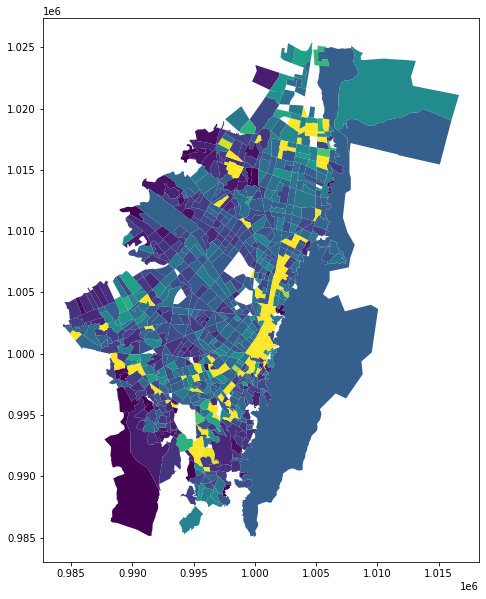

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
ZAT_destinations.plot('ratio', ax=ax, cmap = mpl.colormaps.get_cmap('viridis'), linewidth=0, alpha=1, norm=Normalize(vmin=0, vmax=1))
# ZAT.boundary.plot(ax=ax, color='black', linewidth=0.3, alpha=1)


plt.savefig('links_dest_map.pdf', dpi=300, bbox_inches='tight')

# GEO cities3

In [10]:
import pandas as pd
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [ ]:
zcta = gpd.read_file('geo/zcta510/tl_2020_us_zcta510.shp')
zcta = zcta.astype({'ZCTA5CE10': 'int64'})

In [15]:
statename = 'fl'
city = 'miami'

states_fips = pd.read_csv('geo/states_fips.txt',sep=',', index_col=0)
statefip = states_fips.loc[statename,'FIPS']


zcta_index = pd.read_csv('cities3/'+city+'/zcta_index.csv', sep=' ')#.reset_index()
zcta_index = zcta.merge(zcta_index, left_on='ZCTA5CE10', right_on='zcta')
zcta_index = zcta_index.sort_values('zcta_index')[['zcta', 'zcta_index', 'geometry']].rename(columns={'zcta_index':'index'})

In [20]:
Nlc = '5000'

chosenLinks = pd.read_csv(f"chosen_links/{Nlc}_miami.txt", sep = "\t", header = None, names = ['i_index', 'j_index', 'population'])
# Get the ZAT of each link
chosenLinks_zcta = pd.merge(
    chosenLinks, zcta_index, left_on = 'i_index', right_on = 'index', how = 'left').merge(
    zcta_index, left_on = 'j_index', right_on = 'index', how = 'left')[['zcta_x', 'zcta_y', 'population']].rename(columns={'zcta_x': 'i_zcta', 'zcta_y': 'j_zcta'})


mobnetwork = pd.read_csv('chosen_links/ALL_miami.txt', sep = "\t", header = None, names = ['i_index', 'j_index', 'population'])
# Get the ZAT of each link
mobnetwork_zcta = pd.merge(
    mobnetwork, zcta_index, left_on = 'i_index', right_on = 'index', how = 'left').merge(
    zcta_index, left_on = 'j_index', right_on = 'index', how = 'left')[['zcta_x', 'zcta_y', 'population']].rename(columns={'zcta_x': 'i_zcta', 'zcta_y': 'j_zcta'})

chosen_dest = chosenLinks_zcta.groupby('j_zcta')['population'].sum().reset_index().rename(columns={'population': 'chosen_dest', 'j_zcta': 'zcta'})
total_dest = mobnetwork_zcta.groupby('j_zcta')['population'].sum().reset_index().rename(columns={'population': 'total_dest', 'j_zcta': 'zcta'})

zcta_destinations = pd.merge(zcta_index, chosen_dest, on = 'zcta', how = 'left').merge(total_dest, on = 'zcta', how = 'left').fillna(0)

zcta_destinations['ratio'] = (zcta_destinations['chosen_dest'] / zcta_destinations['total_dest']).fillna(0)

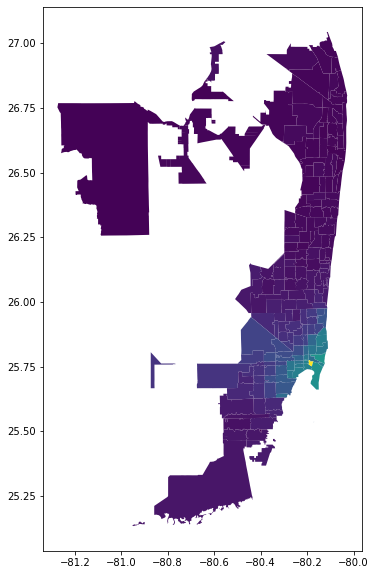

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
zcta_destinations.plot('ratio', ax=ax, cmap = mpl.colormaps.get_cmap('viridis'), linewidth=0, alpha=1, norm=Normalize(vmin=0, vmax=1))
# ZAT.boundary.plot(ax=ax, color='black', linewidth=0.3, alpha=1)



# graph = nx.from_pandas_edgelist(chosenLinks_zcta, source='i_zcta', target='j_zcta', edge_attr=['population'], create_using=nx.DiGraph).to_directed()
# graph.remove_edges_from(nx.selfloop_edges(graph))

# centroids = pd.DataFrame(data={'x':zcta_index.centroid.x, 'y':zcta_index.centroid.y})
# centroids.index = zcta_index['zcta']
# centroids = centroids.apply(list, axis=1)

# strength = np.array([graph.edges[e]['population'] for e in graph.edges])
# nx.draw_networkx(graph, pos=centroids, ax=ax, arrows=True, arrowsize=20, width=np.power(strength/2000, 1/5), node_size=0, edge_color='firebrick',
#     with_labels=False, arrowstyle='->', connectionstyle='arc3,rad=0.2', alpha=np.power(strength/strength.max(),1/10));

plt.savefig(f'links_dest_{city}.pdf', dpi=300, bbox_inches='tight')